# Impact of the amount of training data {#sec-impact-notebook}

In this section, the evolution of the overall accuracy and F1-scores of the activities are first visually analysed. Then, statistical analyses are performed to determine the effect of the addition of training data on the model accuracy.

::: {.callout-warning}
## Plotly loading issue
This page contains Plotly interactive figures. Sometimes, the figures might not load properly and show a blank image. **Reloading the page might solve the loading issue**.
:::

In [1]:
from libs.chapter3.analysis.data_loading import load_reports
from libs.chapter3.analysis.model import Model, Source, ActivityMetric, ModelMetric, Filter, TargetFilter
from libs.chapter3.analysis.visualization import plot_evolution, plot_comparison, plot_pairwise_comparision

MODELS = [Model.MLP, Model.CNN, Model.LSTM, Model.CNN_LSTM]
SOURCES = [Source.SP, Source.SW, Source.FUSED]
SOURCES_PRINT = {
    Source.SP: 'Smartphone',
    Source.SW: 'Smartwatch',
    Source.FUSED: 'Fused'
}
EVOLUTION_PLOT_TITLES = ['Smartphone', 'Smartwatch', 'Fused']

reports = load_reports()

/opt/homebrew/Caskroom/miniforge/base/envs/tf310/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Visual inspection

[@fig-mlp_ev;-@fig-cnn_ev;-@fig-lstm_ev;-@fig-cnn_lstm_ev] show the accuracy evolution regarding the increasing training set size in the **MLP**, **CNN**, **LSTM** and **CNN-LSTM** models, respectively. 

In every model, a clear tendency can be observed: the models trained with **smartphone** or **fused** data present a drastic increase of the model accuracy with low amounts of data, i.e., $n \leq 7$. On the other side, the models trained with **smartwatch** data have a smoother evolution.

Another tendency is observed with medium amounts of data, i.e., $8 \leq n \leq 12$: the evolution in all models and data sources tends to stabilize with very slight improvements in accuracy. In the case of the models trained with **smartphone** and the **fused** data, this stabilization threshold is around $n \in [10,11]$, while with the **smartwatch**-trained models the threshold is a bit lower, around $n \in [8,9]$.

It can also be observed that the models trained with the **smartwatch** data provide the most stable results, having the lowest SD and range, except in the MLP model, where the **smartphone** and **fused** data obtain better results. In general, the evolution tendency shown by the **smartphone** and the **fused** data is similar, although the **fused** data obtains slightly better results in all metrics.

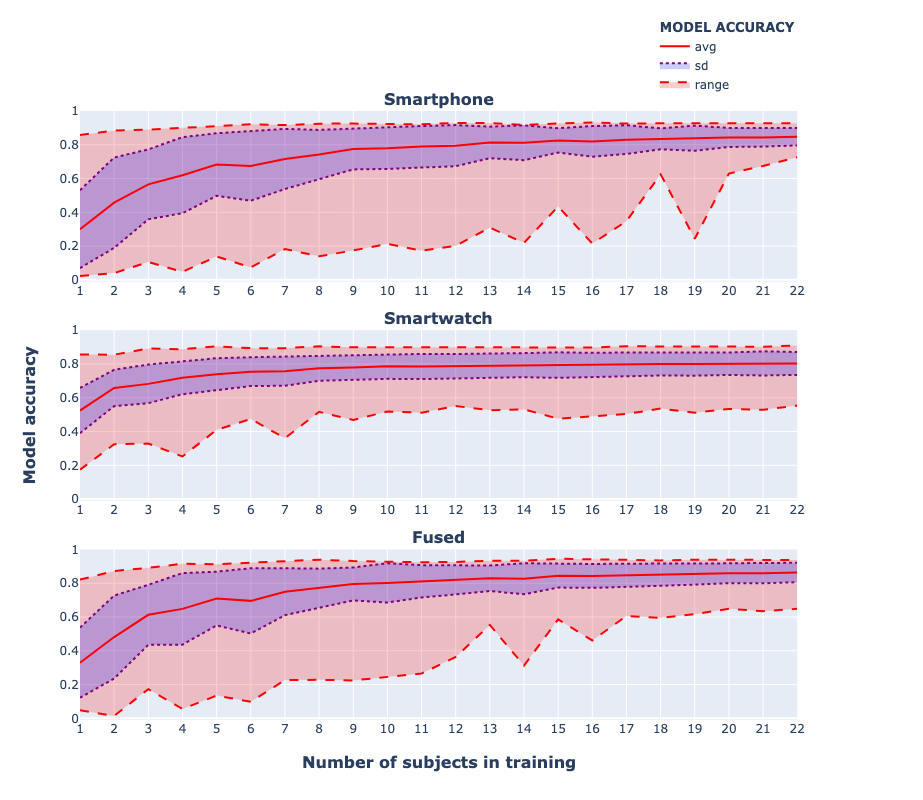

In [2]:
#| label: fig-mlp_ev
#| fig-cap: "MLP accuracy evolution for smartphone, smartwatch and fused data sources."

plot_evolution(
    reports, 
    SOURCES, 
    Filter(Model.MLP, None, TargetFilter.MODEL, ModelMetric.ACCURACY),
    EVOLUTION_PLOT_TITLES
)

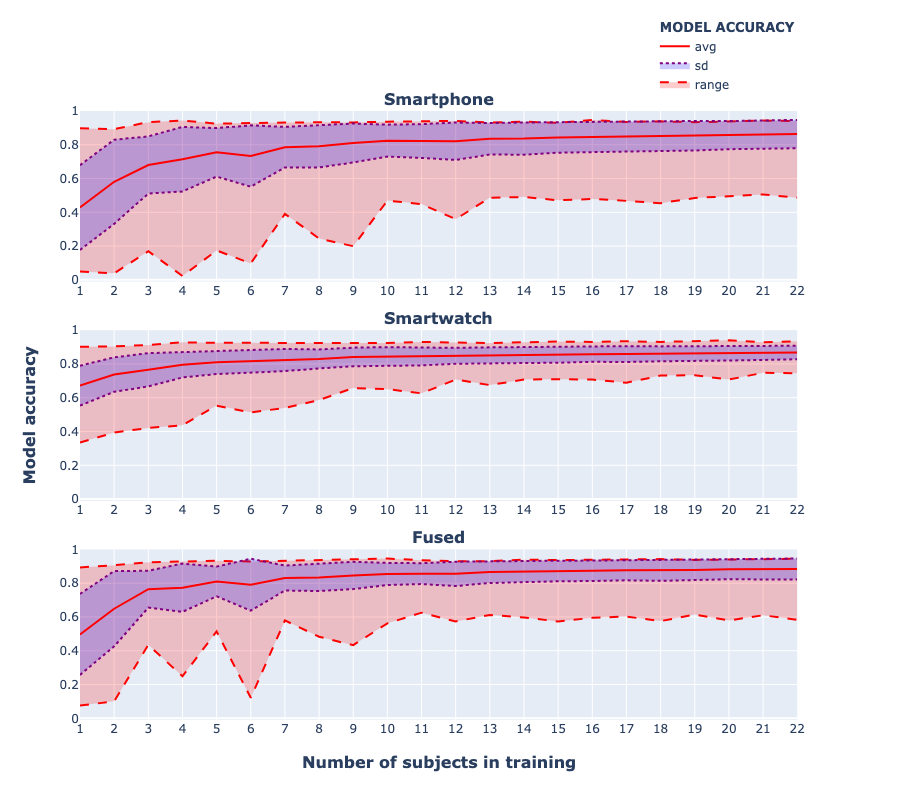

In [3]:
#| label: fig-cnn_ev
#| fig-cap: "CNN accuracy evolution for smartphone, smartwatch and fused data sources."

plot_evolution(
    reports, 
    SOURCES, 
    Filter(Model.CNN, None, TargetFilter.MODEL, ModelMetric.ACCURACY),
    EVOLUTION_PLOT_TITLES
)

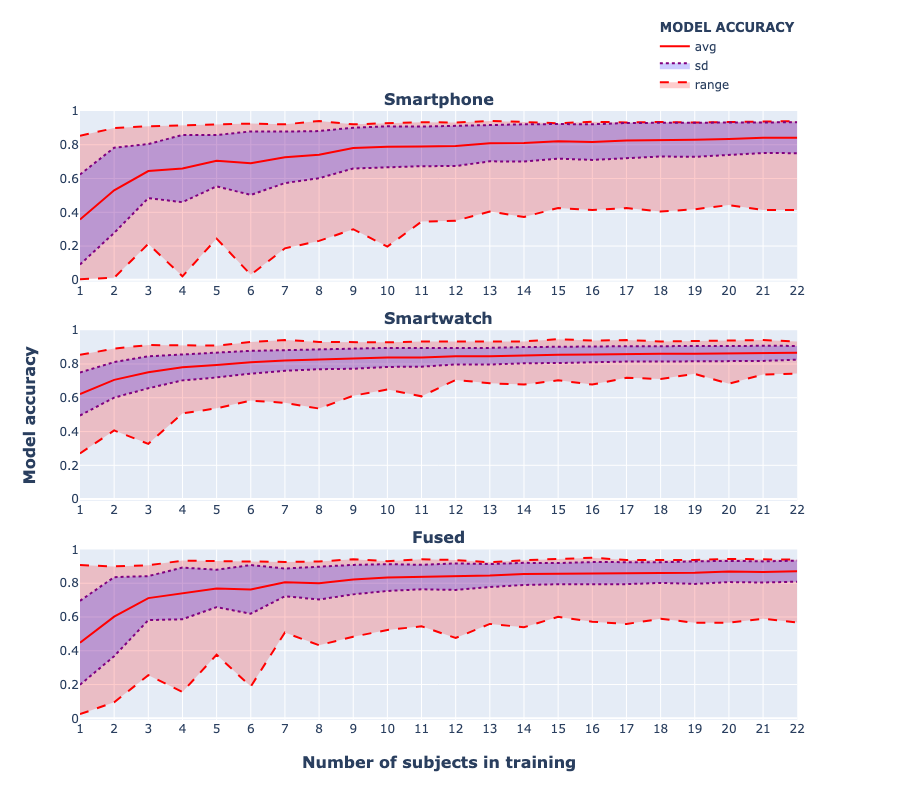

In [4]:
#| label: fig-lstm_ev
#| fig-cap: "LSTM accuracy evolution for smartphone, smartwatch and fused data sources."

plot_evolution(
    reports, 
    SOURCES, 
    Filter(Model.LSTM, None, TargetFilter.MODEL, ModelMetric.ACCURACY),
    EVOLUTION_PLOT_TITLES
)

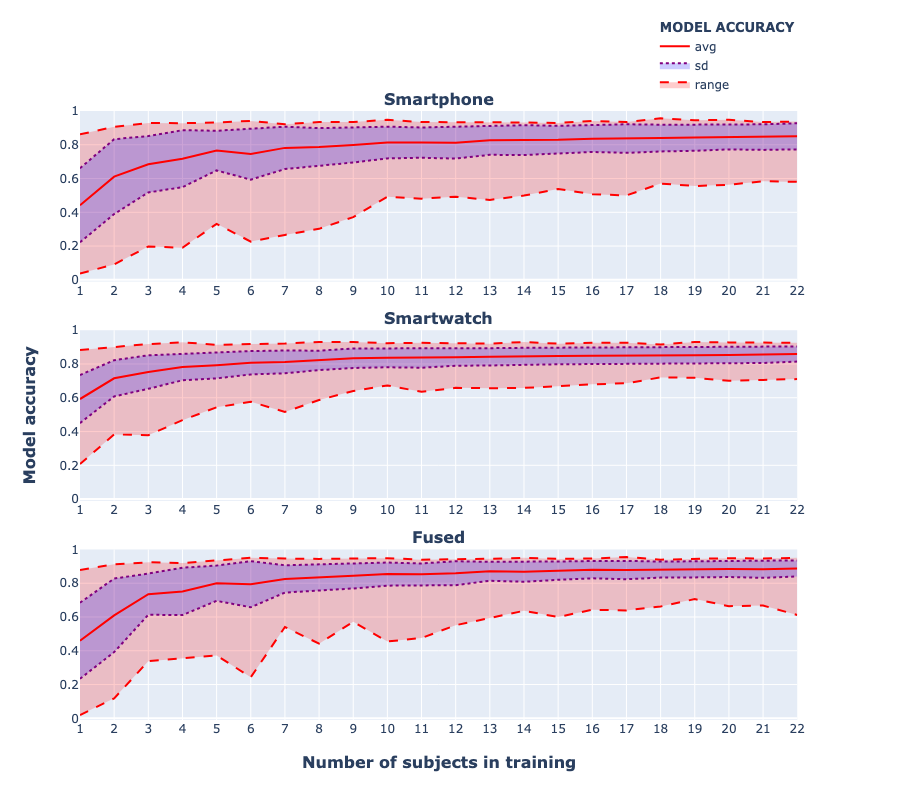

In [5]:
#| label: fig-cnn_lstm_ev
#| fig-cap: "CNN-LSTM accuracy evolution for smartphone, smartwatch and fused data sources."

plot_evolution(
    reports, 
    SOURCES, 
    Filter(Model.CNN_LSTM, None, TargetFilter.MODEL, ModelMetric.ACCURACY),
    EVOLUTION_PLOT_TITLES
)

Regarding individual activities, [@fig-seated_ev;-@fig-standing_ev;-@fig-walking_ev;-@fig-turning_ev;-@fig-sitting_ev] show the F1-score evolution produced by increasing the training set size in the `SEATED`, `STANDING_UP`, `WALKING`, `TURNING` and `SITTING_DOWN` activities, respectively. 

In the `SEATED` activity, the bad performance of the models trained with **smartphone** data stands out. These models show F1-scores $0$ or close to $0$ with any amount of data, except the CNN-LSTM model. This behaviour is also reproduced in the `STANDING_UP` and `SITTING_DOWN` activities. In these activities, the bad performance also transfers to the models trained with **fused** data when few data is used for training, but in part mitigated with higher amounts of data. However, in any case, the models trained with **smartwatch** data show a better evolution for these activities. Notwithstanding, while the metrics of the models in the `SEATED` activity are quite stable, for the `STANDING_UP` and `SITTING_DOWN` activities the evolution curve in the **smartphone** and **fused** data suggests the evaluation metrics could have been improved with more data. 

In the `WALKING` and `TURNING` activities, it is remarkable the enormous evolution with few data ($n \leq 3$) in the **smartphone** and **fused** models compared with the other activities. For instance, to reach similar performance levels (F1-score $\geq 0.6$), the `SEATED` activity requires $n \geq 7$, or the `STANDING_UP` and `SITTING_DOWN` activities $n \geq 9$. This rapid evolution contrasts with the small increase in the evolution on the **smartwatch**-trained models, which already perform well with very few data. It is also noticeable the good performance of the **smartphone**- and **fused**-trained models with the highest amounts of data, which improve the models trained with **smartwatch** data. This clearly contrasts with the other activities, where the **smartwatch**-trained models show the best performance.

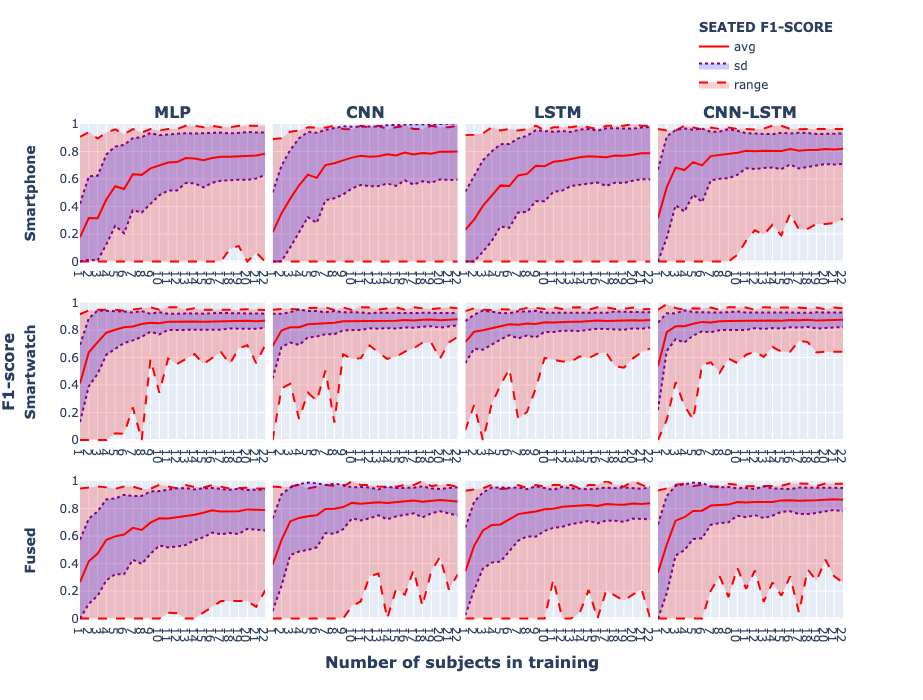

In [6]:
#| label: fig-seated_ev
#| column: page
#| fig-cap: "F1-score evolution of the `SEATED` activity across models and data sources."

plot_comparison(
    reports, 
    MODELS,
    SOURCES, 
    Filter(None, None, TargetFilter.SEATED, ActivityMetric.F1), 
    SOURCES_PRINT
)

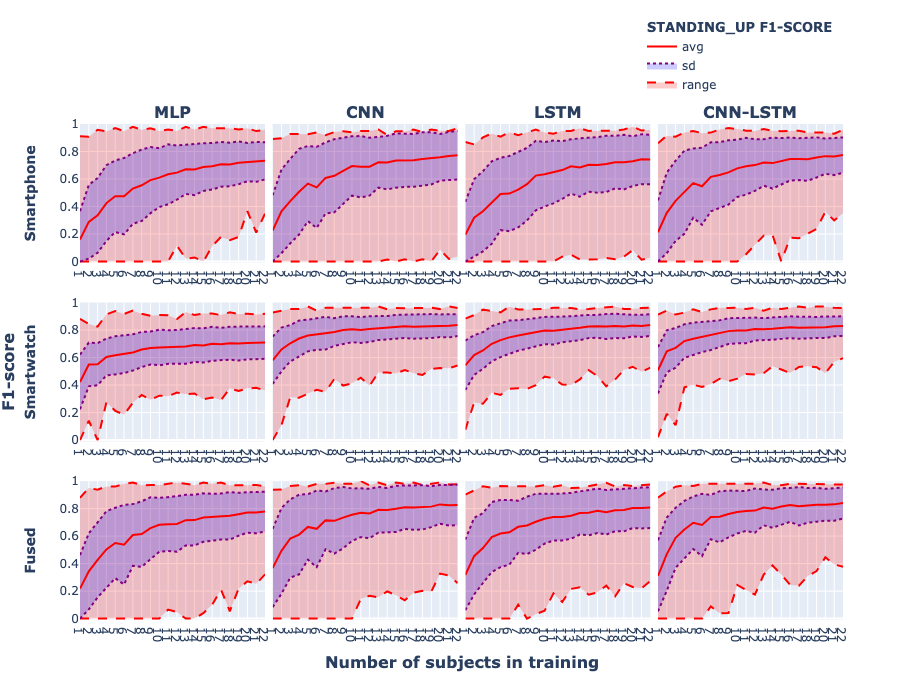

In [7]:
#| label: fig-standing_ev
#| fig-cap: "F1-score evolution of the `STANDING_UP` activity across models and data sources."
#| column: page

plot_comparison(
    reports, 
    MODELS,
    SOURCES, 
    Filter(None, None, TargetFilter.STANDING_UP, ActivityMetric.F1), 
    SOURCES_PRINT
)

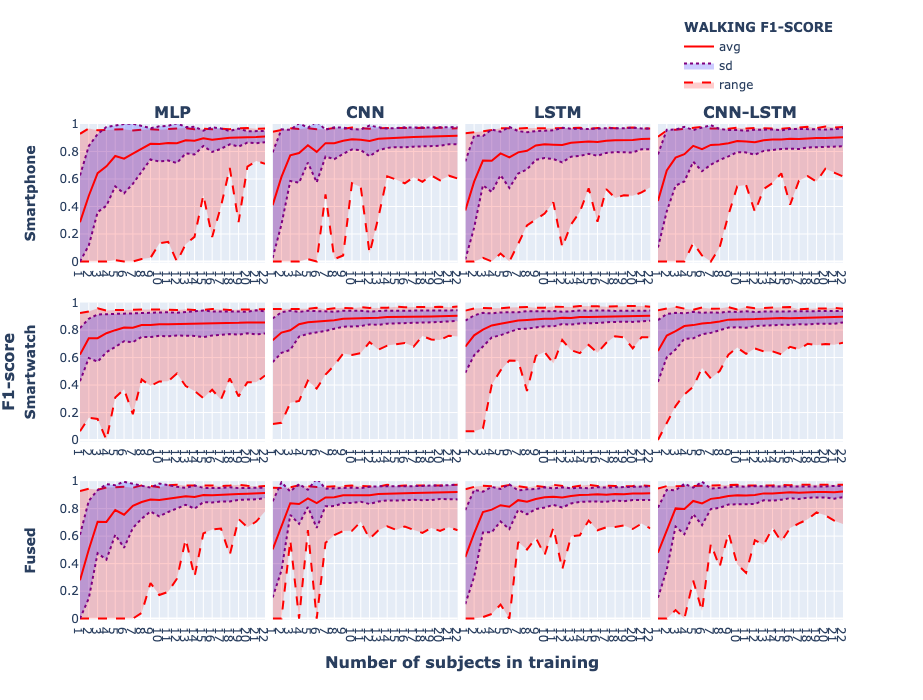

In [8]:
#| label: fig-walking_ev
#| fig-cap: "F1-score evolution of the `WALKING` activity across models and data sources."
#| column: page

plot_comparison(
    reports, 
    MODELS,
    SOURCES, 
    Filter(None, None, TargetFilter.WALKING, ActivityMetric.F1), 
    SOURCES_PRINT
)

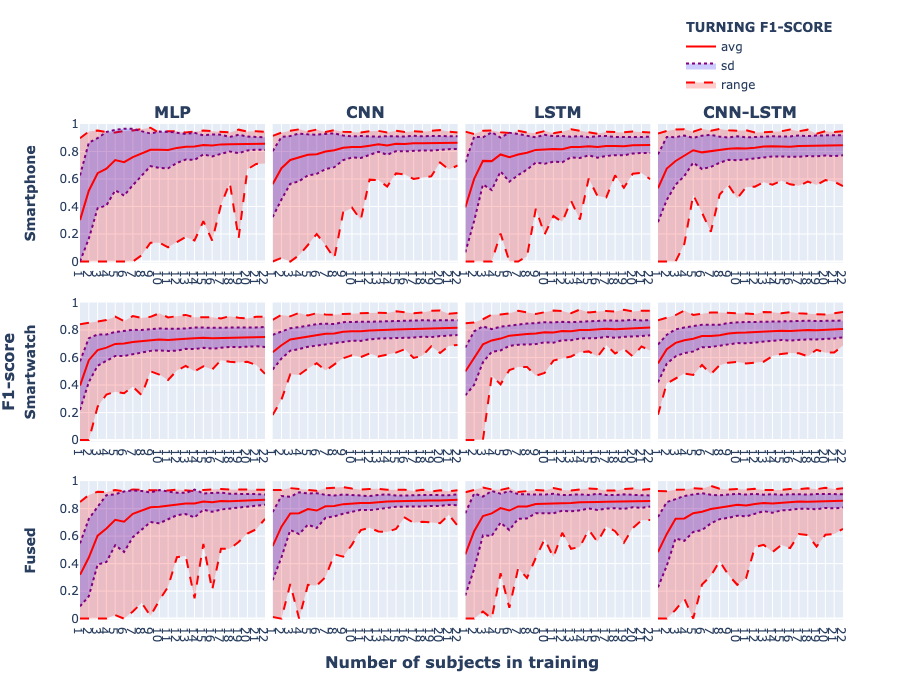

In [9]:
#| label: fig-turning_ev
#| fig-cap: "F1-score evolution of the `TURNING` activity across models and data sources."
#| column: page

plot_comparison(
    reports, 
    MODELS,
    SOURCES, 
    Filter(None, None, TargetFilter.TURNING, ActivityMetric.F1), 
    SOURCES_PRINT
)

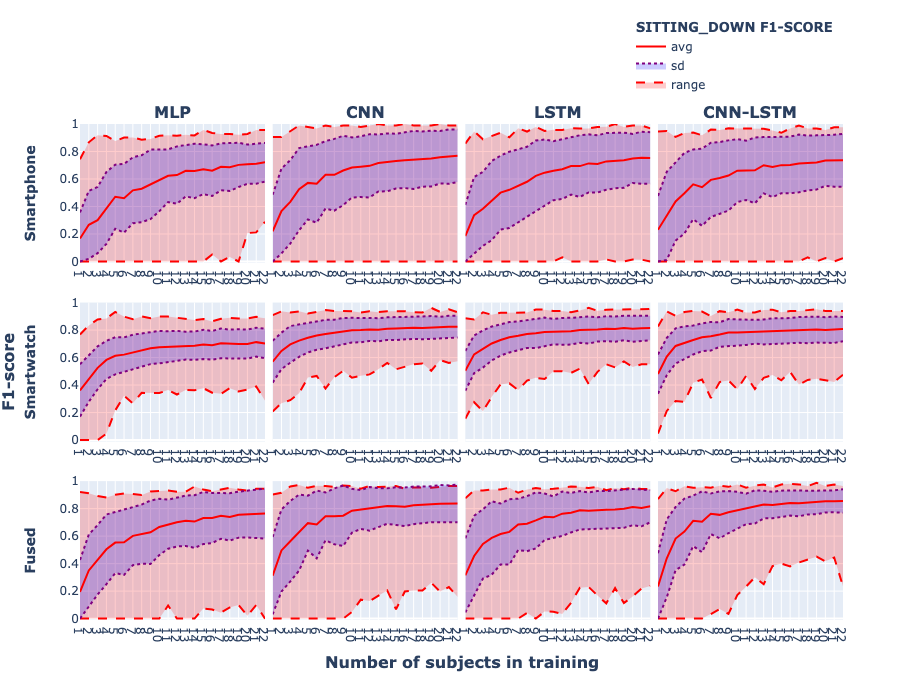

In [10]:
#| label: fig-sitting_ev
#| fig-cap: "F1-score evolution of the `SITTING_DOWN` activity across models and data sources."
#| column: page

plot_comparison(
    reports, 
    MODELS,
    SOURCES, 
    Filter(None, None, TargetFilter.SITTING_DOWN, ActivityMetric.F1), 
    SOURCES_PRINT
)

## Statistical analysis

[@fig-mlp_pairwise;-@fig-cnn_pairwise;-@fig-lstm_pairwise;-@fig-cnn_lstm_pairwise] depict the statistical tests executed to determine the significance of the difference in accuracy caused by increasing training data in the MLP, CNN, LSTM and CNN-LSTM models respectively. In practice, the accuracy obtained from training models with $n_1$ subjects is compared with the accuracies obtained in models trained with $n_2$ subjects, where $n_2 > n_1$ (i.e., _does the accuracy statistically improve when training with more subjects?_).

::: {.column-margin}

::: {.callout-note}
Prior to executing the statistical tests, the normality of the data was tested in order to use **parametric** or **non-parametric** tests. The results determined the **non-normality** of the data. The normality was tested using the [`is_parametric_data`](reference/chapter3.statistical_tests.qmd#libs.chapter3.statistical_tests.is_parametric_data).
:::

:::

Overall, when the training data increases the accuracy increases too (with some isolated exceptions) in any model and data source, although this increase is not always significant. In every model and data source, improvements of the type $n_1 < n_2 + 1$ (i.e., adding the data of one subject more) start to be not significant around $n_1 \in [4,6]$.

Then, significant improvements seem to appear after 1) a certain threshold and 2) a specific amount of extra data (i.e., $n_1 < n_2 + x$). The first case is observed in the CNN and LSTM models. In both models, improvements are obtained when $n_1 \in [9,12]$ and $n_2 \in [13,14]$ across all data sources. In the MLP, there are improvements on $n_2 = 22$ when $n_1 \in [14,16]$ and $[17,18]$ with **smartwatch** and **fused** data, respectively; in the LSTM models, when $n_1 \in [14,16]$ improvements are observed when $n_2 = 20$ with any data source; and in the CNN-LSTM model, when $n_1 \in [16,18]$ improvements appear in $n_2 = 22$ with the **fused** data. 

Examples of the second case can be noticed in the CNN model with **smartphone** and  **smartwatch** data, where improvements to $n_1 \in [15, 17]$ and $n_1 \in [14,16]$, respectively, require the addition of data from $5$ subjects. The CNN-LSTM model also shows this behaviour with **smartphone** data, where improvements to $n_1 \in [9, 17]$ require the addition of data from $[3,5]$ subjects; the **smartwatch**, which requires data from $[4,6]$ subjects to obtain improvements when $n_1 \in [9,16]$; and with **fused** data, where improvements to $n_1 \in [9,13]$ are obtained after adding data from $2$ subjects.

Finally, no significant changes are observed after a certain range of values for $n_1$ is reached. In addition, these values seem constant across model architectures. For example, in models trained with **smartphone** data, no differences are observed after $n_1 \geq [17, 18]$. In the case of the **smartwatch** data, there are no improvements after $n_1 \geq 17$. These values are a bit higher for the models trained with **fused** data, around $n_1 \in [19,20]$.

::: {.column-margin}

::: {.callout-note}
The following figures are the visual representation of the output from [`pairwise_n_comparision`](reference/chapter3.statistical_tests.qmd#libs.chapter3.statistical_tests.pairwise_n_comparision).
:::

:::

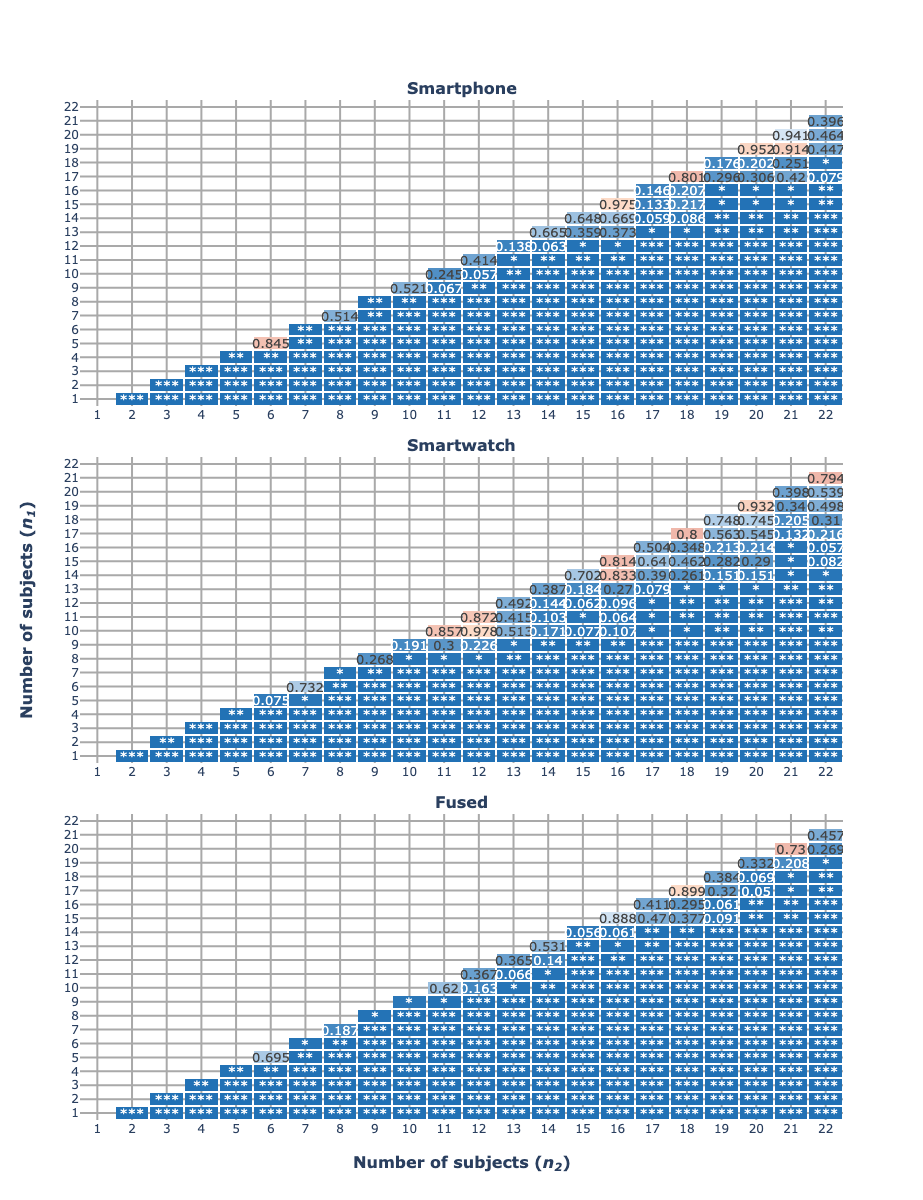

In [11]:
#| label: fig-mlp_pairwise
#| fig-cap: "Statistical comparison using MWU tests over MLP models accuracy with smartphone, smartwatch and fused data sources."
#| column: page-right

plot_pairwise_comparision(
    reports, 
    SOURCES, 
    Filter(Model.MLP, None, TargetFilter.MODEL, ModelMetric.ACCURACY), 
    SOURCES_PRINT, 
    stars=True, 
    parametric=False, 
    alternative='two-sided'
)

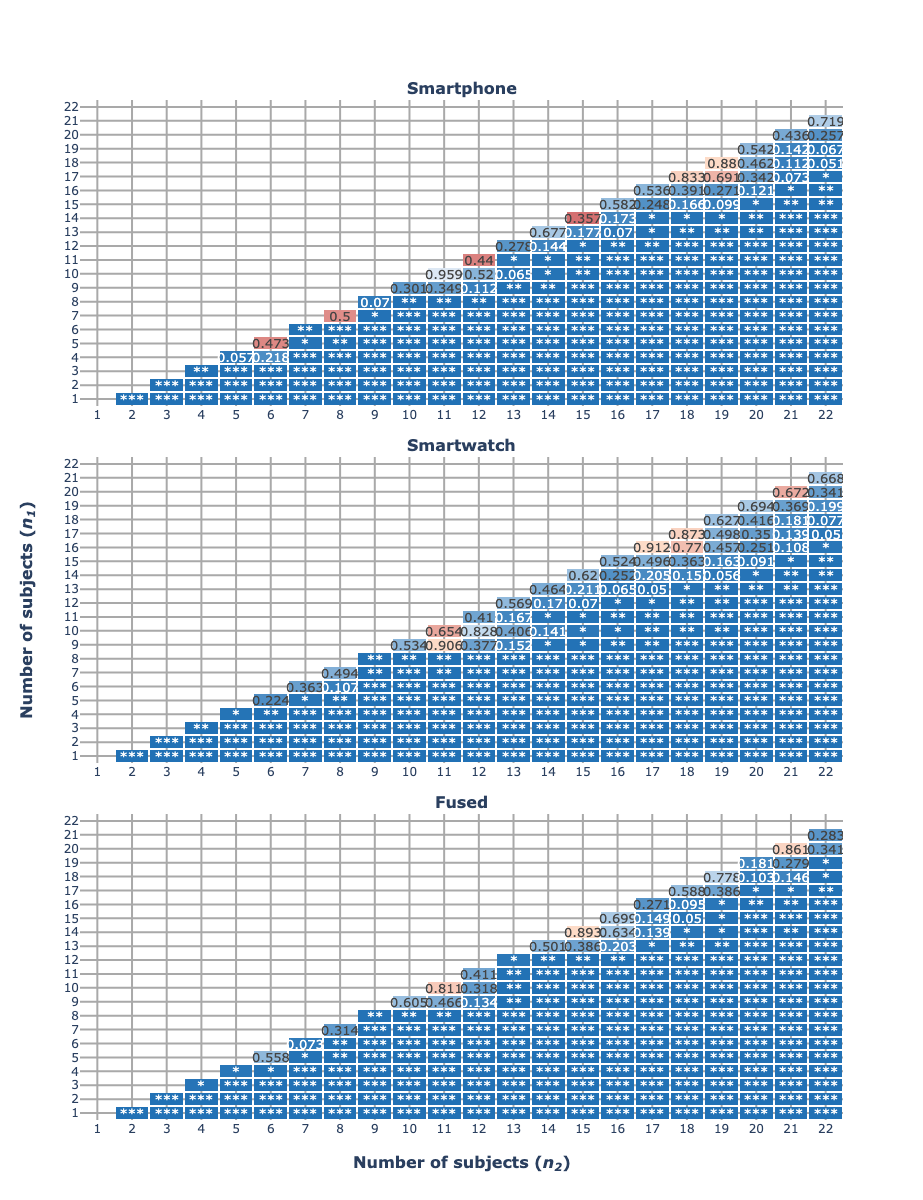

In [12]:
#| label: fig-cnn_pairwise
#| fig-cap: "Statistical comparison using MWU tests over CNN models accuracy with smartphone, smartwatch and fused data sources."
#| column: page-right

plot_pairwise_comparision(
    reports, 
    SOURCES, 
    Filter(Model.CNN, None, TargetFilter.MODEL, ModelMetric.ACCURACY), 
    SOURCES_PRINT, 
    stars=True, 
    parametric=False, 
    alternative='two-sided'
)

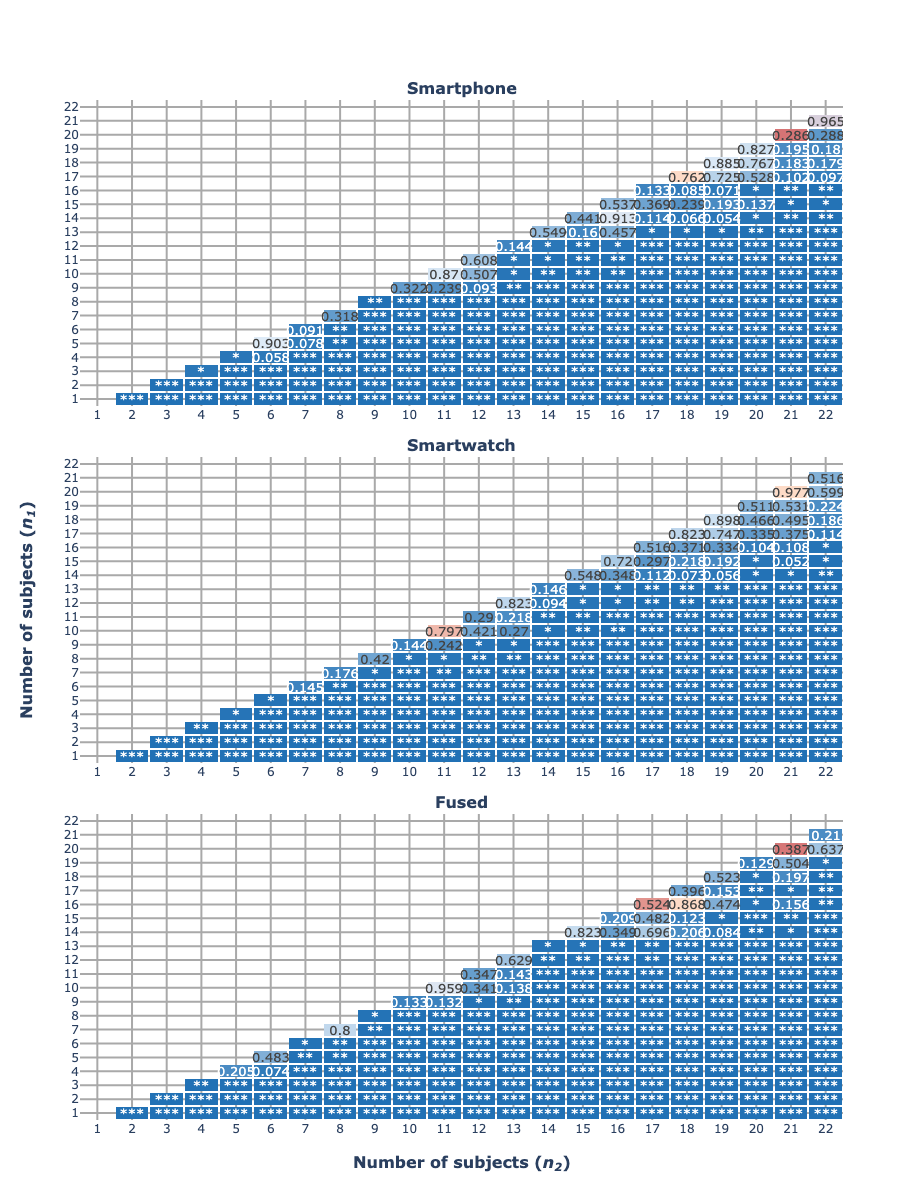

In [13]:
#| label: fig-LSTM_pairwise
#| fig-cap: "Statistical comparison using MWU tests over LSTM models accuracy with smartphone, smartwatch and fused data sources."
#| column: page-right

plot_pairwise_comparision(
    reports, 
    SOURCES, 
    Filter(Model.LSTM, None, TargetFilter.MODEL, ModelMetric.ACCURACY), 
    SOURCES_PRINT, 
    stars=True, 
    parametric=False, 
    alternative='two-sided'
)

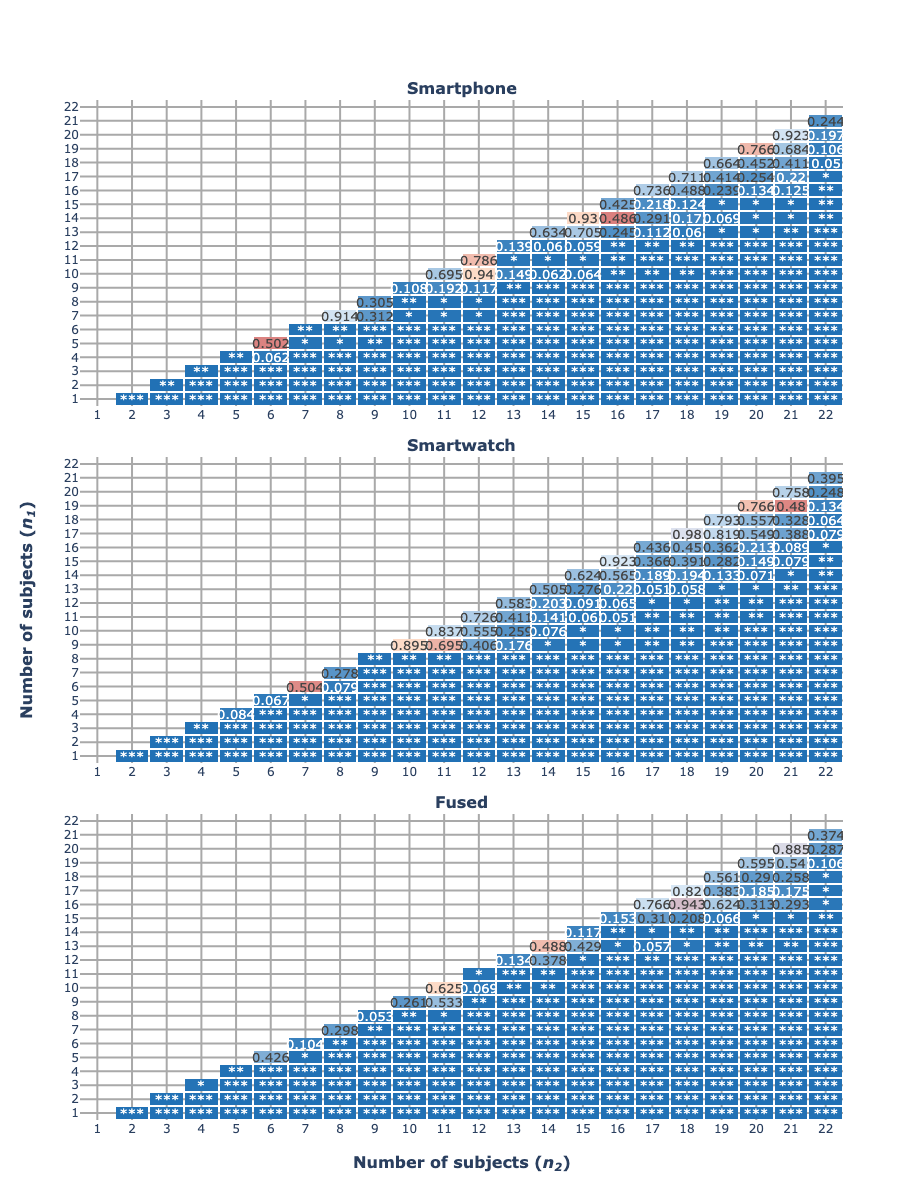

In [14]:
#| label: fig-cnn_lstm_pairwise
#| fig-cap: "Statistical comparison using MWU tests over CNN-LSTM models accuracy with smartphone, smartwatch and fused data sources."
#| column: page-right

plot_pairwise_comparision(
    reports, 
    SOURCES, 
    Filter(Model.CNN_LSTM, None, TargetFilter.MODEL, ModelMetric.ACCURACY), 
    SOURCES_PRINT, 
    stars=True, 
    parametric=False, 
    alternative='two-sided'
)

## Summary

The presented analyses on the effect of the training set size go beyond the existing related works in the literature. We statistically analysed how the models' performance evolves regarding the amount of data while also comparing these evolutions with several data sources and taking into account activity-wise performance.

A first visual inspection clearly showed a fast evolution in the models' accuracy and activities F1-scores with a low amount of data going towards stabilization with higher amounts of data. In addition, this evolution was more abrupt for the models trained with **smartphone** and **fused** data since their initial performance was much lower than that of the **smartwatch**-trained models (i.e., they had more room for improvement). Moreover, a threshold was identified around $n \in [10,11]$ for **smartphone**- and **fused**-trained models, and $n \in [8,9]$ for **smartwatch**-trained models, in which the improvement speed of the models seemed to stabilize.

These insights were confirmed after the statistical analysis of the models' evolutions. We observed that with $n \in [4,6]$ the addition of data from one subject did not involve significant improvements. This lack of improvement was further deepened for $n \geq 9$, where the addition of several subjects' data was required for significant improvements.

We also identified that significant improvements after this threshold appear at a later threshold(s) or after the addition of specific amounts of data and that this behaviour depends on the data source and the model architecture. For instance, MLP showed improvements at $n=17$ with the **smartwatch** dataset and the LSTM at $n=14$ with the fused dataset, while the CNN and CNN-LSTM obtained improvements at certain thresholds or after the addition of the data from $5$ (CNN with **smartphone** or **smartwatch** datasets), $[4,6]$ (CNN-LSTM with **smartwatch** datasets), or $2$ (CNN-LSTM with **fused** dataset) subjects. 

Finally, no significant improvements were consistently found across model architectures after using $n \in [17,18]$ for \textbf{smarphone}-trained models, $n = 17$ for **smartwatch**-trained models and $n \in [19,20]$ for **fused**-trained models. However, this lack of improvement is probably caused by the limited amount of data, i.e., $n = 22$.

In summary, the results have shown that the models improve fast when the available data is limited, but tend to stabilize with higher amounts of data. Among the selected models, the improvement on the MLP and the LSTM seems to be conditioned by reaching certain thresholds, while the CNN and CNN-LSTM can be constantly improved by the addition of specific amounts of data. Among the data sources, the **smartwatch**-trained models present a good performance from low amounts of data but show a slower evolution than the **smartphone**- and **fused**-trained models. In addition, with high amounts of data, the **fused**-trained models seem to require a smaller amount of data to keep improving.

## Code reference

::: {.callout-tip}
The documentation of the Python functions employed in this section can be found in
 [Chapter 3 reference](reference/index.qmd#chapter-3):

- [`data_loading`](reference/chapter3.analysis.data_loading.qmd):
  - [`load_reports`](reference/chapter3.analysis.data_loading.qmd#libs.chapter3.analysis.data_loading.load_reports)
- [`model`](reference/chapter3.analysis.model.qmd):
  - [`ActivityMetric`](reference/chapter3.analysis.model.qmd#libs.chapter3.analysis.model.ActivityMetric)
  - [`Filter`](reference/chapter3.analysis.model.qmd#libs.chapter3.analysis.model.Filter)
  - [`Model`](reference/chapter3.analysis.model.qmd#libs.chapter3.analysis.model.Model)
  - [`ModelMetric`](reference/chapter3.analysis.model.qmd#libs.chapter3.analysis.model.ModelMetric)
  - [`Source`](reference/chapter3.analysis.model.qmd#libs.chapter3.analysis.model.Source)
  - [`TargetFilter`](reference/chapter3.analysis.model.qmd#libs.chapter3.analysis.model.TargetFilter)
- [`visualization`](reference/chapter3.analysis.visualization.qmd):
  - [`plot_comparison`](reference/chapter3.analysis.visualization.qmd##libs.chapter3.analysis.visualization.plot_comparison)
  - [`plot_evolution`](reference/chapter3.analysis.visualization.qmd##libs.chapter3.analysis.visualization.plot_evolution)
  - [`plot_pairwise_comparision`](reference/chapter3.analysis.visualization.qmd##libs.chapter3.analysis.visualization.plot_pairwise_comparision)
:::